In [68]:
import os
from PIL import Image

img_list = ['/'.join(['/content/sample_data',img]) for img in os.listdir('/content/sample_data') if img.endswith('.jpg')]
img_list.sort()
img_list


['/content/sample_data/Screenshot_20240402_220744_com.devsisters.ck.jpg',
 '/content/sample_data/Screenshot_20240402_220751_com.devsisters.ck.jpg',
 '/content/sample_data/Screenshot_20240402_220800_com.devsisters.ck.jpg',
 '/content/sample_data/Screenshot_20240402_220805_com.devsisters.ck.jpg',
 '/content/sample_data/Screenshot_20240402_220810_com.devsisters.ck.jpg',
 '/content/sample_data/Screenshot_20240402_220816_com.devsisters.ck.jpg']

In [69]:
def crop_image(image_path):
    '''
    '''
    required_size = (2340, 1080)
    # Assuming the crop areas are given as (left, upper, right, lower)
    crop_area =  (585,559,1685,910)
    # Load the image
    img = Image.open(image_path)

    if img.size == required_size:
        return img.crop(crop_area)
    else:
        print(f'The size of the image is {img.size}, which does not match the required size (2340, 1080).')



In [70]:
crop_img_list = []
for idx,img_path in enumerate(img_list):
    crop_img = crop_image(image_path=img_path)
    crop_img_list.append(crop_img)
crop_img_list

[<PIL.Image.Image image mode=RGB size=1100x351>,
 <PIL.Image.Image image mode=RGB size=1100x351>,
 <PIL.Image.Image image mode=RGB size=1100x351>,
 <PIL.Image.Image image mode=RGB size=1100x351>,
 <PIL.Image.Image image mode=RGB size=1100x351>,
 <PIL.Image.Image image mode=RGB size=1100x351>]

In [13]:

# Load the uploaded image
path_to_img='/content/sample_data/Screenshot_20240402_220744_com.devsisters.ck.jpg'
original_image = Image.open(path_to_img)

# Crop the images and store them in a list
cropped_image = original_image.crop(crop_area)


In [ ]:
from PIL import Image

def crop_images(image_path, crop_areas):
    # Load the image
    img = Image.open(image_path)

    # Crop the images and store them in a list
    cropped_images = [img.crop(area) for area in crop_areas]

    return cropped_images


In [15]:
original_image.size

(2340, 1080)

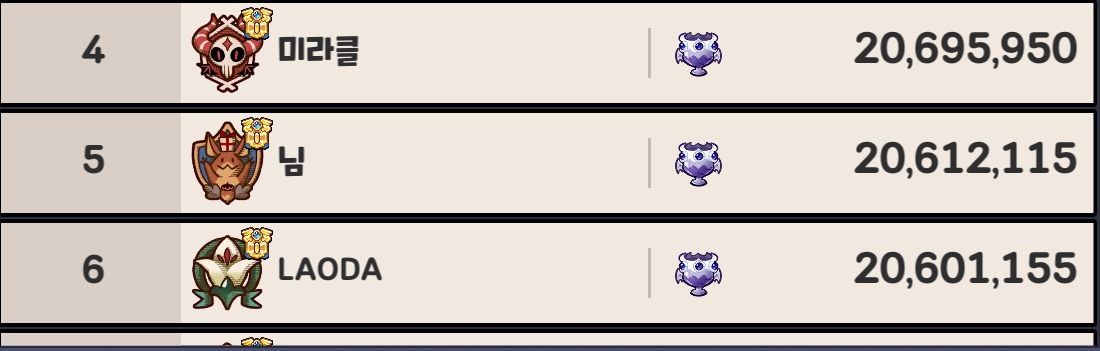

In [3]:
cropped_images

In [71]:

# Create a new image with a width that is the sum of individual image widths
# and a height of the tallest image
max_width = max(image.width for image in crop_img_list)
total_height = sum(image.height for image in crop_img_list)
final_image = Image.new('RGB', (max_width, total_height))

# Paste the images into the final image
y_offset = 0
for image in crop_img_list:
    final_image.paste(image, (0, y_offset))
    y_offset += image.height

# Save the final image
final_image.save('final_image.jpg')


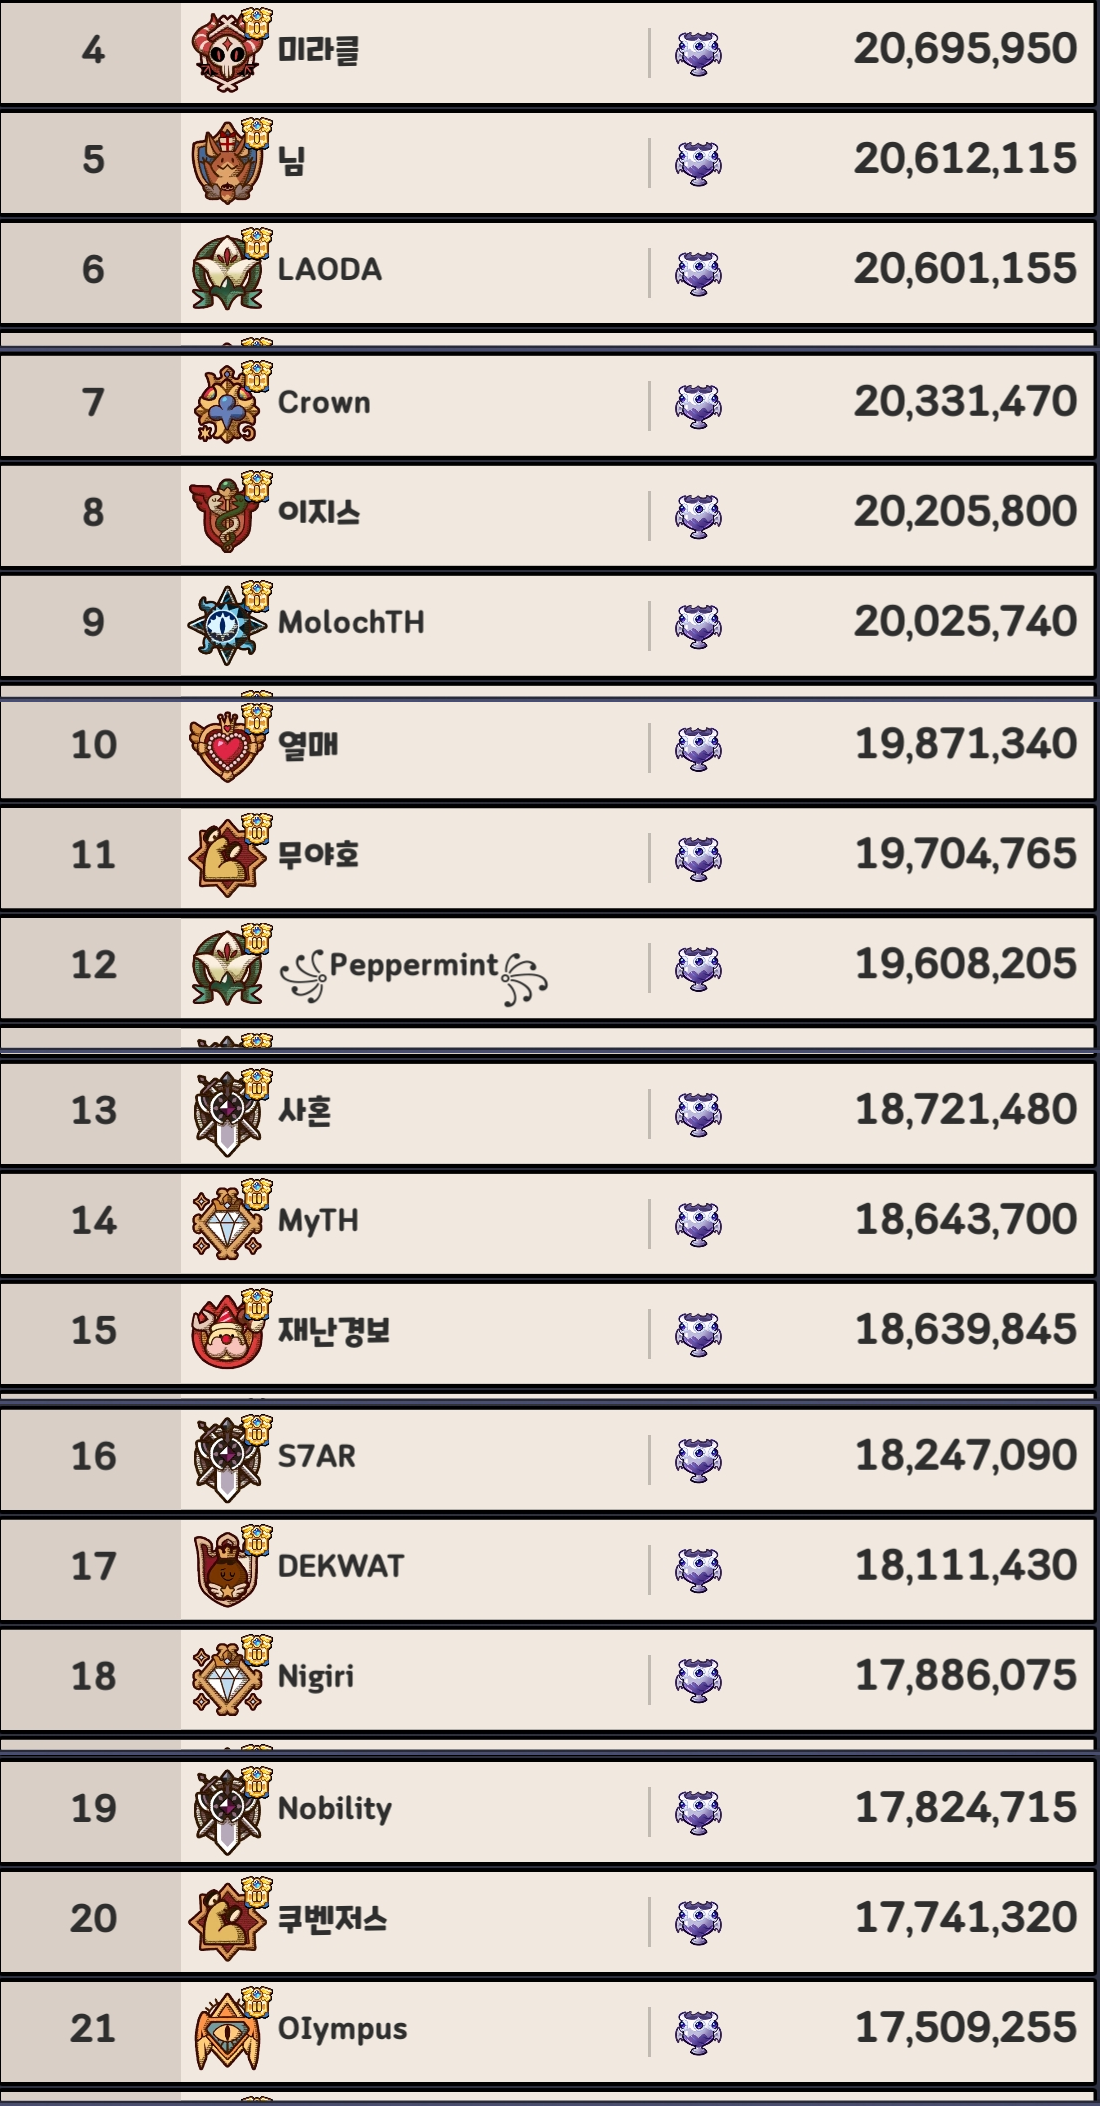

In [72]:
final_image